## Does seasons,events and holidays affect the price of listing.

H0 = Events and Holidays affect the price
H1 = Events and Holidays do not affect the price

First, we want to check if the prices are normally distributed or not. So that we get an idea of the type of hypothesis testing that we should perform. For e.g.: if the prices are normally distributed, then we can apply the t-test, else we can prove asymptotic normality of the average prices (using CLT) and apply the Wald’s test.

To check for normal distribution of prices, we first calculate the parameters for normal distribution using MME ,then we apply the KS Test.
We plot an Estimated CDF:
X-axis will have prices ranging from minimum price seen in the year to the maximum price seen in the year.
Y-axis will have the probability p of seeing a price <=X. (i.e. the CDF value at X).
Apply KS Test and confirm the distribution and according to result, apply t-test of Wald’s test.

P_0 will be the average price of the house before  the event took place.
P_hat will be calculated by taking the average price during the timespan.

P_0 will be calculated taking the average price of the region during the year, before the event has taken place.

We can apply Wald’s test, since we are considering average price and therefore, by CLT this random variable approximately comes from a normal distribution. 
Apply Wald’s test:
(Theat_Hat - Theat_0) / SE_hat
Decide Threshold Value -> alpha = 0.05
Calculate p-value
Calculate CI

Events/Holidays Considered
-Comic Con,Every October,Manhattan
-Presidential Elections,
-Christmas & New Year’s eve,December
-Papal (The Pope) visit,September 2015,Manhattan
-New York City Marathon


In [2]:
import pandas as pd
import csv 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
listing =[]
with open('data/prices_2017.csv','r') as csvfile:
    data = csv.reader(csvfile)    
    for row in data:
        listing.append(row)

In [4]:
listing

[['6952592', '399', 'Manhattan', 'Tribeca', '1'],
 ['5773199', '175', 'Manhattan', 'Upper West Side', '1'],
 ['4593564', '180', 'Manhattan', 'Upper West Side', '1'],
 ['10227297', '62', 'Manhattan', 'Harlem', '1'],
 ['6688437', '89', 'Manhattan', 'East Harlem', '1'],
 ['4198153', '199', 'Manhattan', 'Upper West Side', '1'],
 ['4853885', '150', 'Manhattan', "Hell's Kitchen", '1'],
 ['10228901', '75', 'Manhattan', 'Lower East Side', '1'],
 ['4592900', '95', 'Manhattan', "Hell's Kitchen", '1'],
 ['8918310', '150', 'Manhattan', 'Lower East Side', '1'],
 ['5248336', '359', 'Manhattan', 'East Village', '1'],
 ['8525172', '55', 'Manhattan', 'Upper East Side', '1'],
 ['9311613', '208', 'Manhattan', "Hell's Kitchen", '1'],
 ['9700249', '149', 'Manhattan', 'Midtown', '1'],
 ['3806630', '250', 'Manhattan', 'Battery Park City', '1'],
 ['8000972', '45', 'Manhattan', 'East Harlem', '1'],
 ['6590569', '120', 'Manhattan', 'Chelsea', '1'],
 ['4198667', '45', 'Manhattan', 'East Harlem', '1'],
 ['9572653

In [5]:
len(listing)

202974

In [6]:
prices =list(float(row[1]) for row in listing[1:])

In [7]:
prices = sorted(prices)

In [8]:
uniqp=list(set(prices))
freq=dict()
for p in uniqp:
    freq[p]=0
for price in prices:
    freq[price]+=1 
freq

{10.0: 30,
 15.0: 7,
 19.0: 15,
 20.0: 29,
 21.0: 2,
 22.0: 48,
 23.0: 31,
 24.0: 13,
 25.0: 101,
 26.0: 9,
 27.0: 21,
 28.0: 74,
 29.0: 100,
 30.0: 244,
 31.0: 33,
 32.0: 59,
 33.0: 96,
 34.0: 50,
 35.0: 457,
 36.0: 143,
 37.0: 119,
 38.0: 129,
 39.0: 284,
 40.0: 962,
 41.0: 93,
 42.0: 173,
 43.0: 122,
 44.0: 107,
 45.0: 1688,
 46.0: 121,
 47.0: 172,
 48.0: 272,
 49.0: 695,
 50.0: 2808,
 51.0: 108,
 52.0: 250,
 53.0: 183,
 54.0: 145,
 55.0: 1681,
 56.0: 155,
 57.0: 281,
 58.0: 268,
 59.0: 629,
 60.0: 3112,
 61.0: 103,
 62.0: 219,
 63.0: 275,
 64.0: 156,
 65.0: 2980,
 66.0: 127,
 67.0: 229,
 68.0: 379,
 69.0: 1345,
 70.0: 3653,
 71.0: 222,
 72.0: 314,
 73.0: 183,
 74.0: 248,
 75.0: 4247,
 76.0: 176,
 77.0: 325,
 78.0: 396,
 79.0: 1235,
 80.0: 5041,
 81.0: 177,
 82.0: 197,
 83.0: 167,
 84.0: 300,
 85.0: 3231,
 86.0: 230,
 87.0: 260,
 88.0: 485,
 89.0: 1744,
 90.0: 4431,
 91.0: 243,
 92.0: 319,
 93.0: 223,
 94.0: 184,
 95.0: 3240,
 96.0: 209,
 97.0: 268,
 98.0: 586,
 99.0: 3938,
 100.0: 

In [9]:
value=freq[10.0]
for k,v in freq.items():
    value=value+v
    freq[k]=value/len(prices)
uniqp    

[10.0,
 15.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 15

In [10]:
ecdf =[]
for k,v in freq.items():
    ecdf.append(v)
ecdf =sorted(ecdf)
freq


{10.0: 0.0002956058194932331,
 15.0: 0.00033009316510077696,
 19.0: 0.0004039946199740852,
 20.0: 0.0005468707660624812,
 21.0: 0.0005567242933789224,
 22.0: 0.0007932089489735088,
 23.0: 0.0009459386223783459,
 24.0: 0.001009986549935213,
 25.0: 0.0015075896794154889,
 26.0: 0.0015519305523394738,
 27.0: 0.0016553925891621053,
 28.0: 0.002019973099870426,
 29.0: 0.002512649465692481,
 30.0: 0.003714779798298296,
 31.0: 0.003877362999019574,
 32.0: 0.004168042054854586,
 33.0: 0.004641011366043759,
 34.0: 0.004887349548954787,
 35.0: 0.007138880540761579,
 36.0: 0.007843407743887119,
 37.0: 0.008429692619215364,
 38.0: 0.009065245131125815,
 39.0: 0.010464446010060451,
 40.0: 0.015203992649268623,
 41.0: 0.015662181669483133,
 42.0: 0.016514511782355287,
 43.0: 0.017115576948658198,
 44.0: 0.017642740660087794,
 45.0: 0.025959117715164085,
 46.0: 0.026555256117808772,
 47.0: 0.027402659467022708,
 48.0: 0.028742739182058698,
 49.0: 0.03216683992452198,
 50.0: 0.04600119227680529,
 51.0

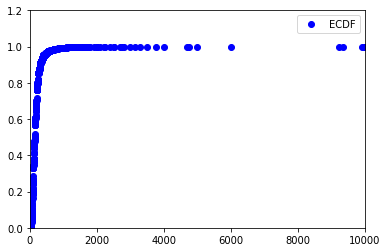

In [11]:
plt.plot(sorted(uniqp),ecdf,'bo',label="ECDF") 
plt.axis([min(uniqp),max(uniqp), 0.0, 1.2])
plt.legend()
plt.show()

In [12]:
# plot for how prices are distributed for 2017
p =[]
with open('data/prices_2017.csv','r') as csvfile:
    data = csv.reader(csvfile)    
    for row in data:
        p.append(row[1])


In [13]:
# added mean price for months-1,2,4,7 in 2015 as the data is missing 
X_2015=np.array([165.6476,165.6476,163.58,165.6476, 163.54, 164.653, 165.6476,171.257, 163.532, 168.843, 156.46, 169.779, 169.185])
mean5=np.mean(X_2015)
print(mean5)
# added mean price for march in 2016 as the data is missing 
X_2016=[147.476, 146.476,148.7347, 147.476, 151.675, 147.476, 148.71, 147.476, 151.559, 148.261, 150.787, 148.71]
X_2017=[147.366, 145.883, 147.676, 146.209, 147.796, 145.115, 143.453, 146.571, 145.444, 145.946, 145.286, 144.763]
# avg prices over month for all months from 2015-2017
X=[163.58, 163.54, 164.653, 171.257, 163.532, 168.843, 156.46, 169.779, 169.185,147.476, 146.476, 147.476, 151.675, 147.476, 148.71, 147.476, 151.559, 148.261, 150.787, 148.71,147.366, 145.883, 147.676, 146.209, 147.796, 145.115, 143.453, 146.571, 145.444, 145.946, 145.286, 144.763]
# months where events occured
months_2015 = ['9','10','11','12']
months = ['10','11','12']

165.64764615384618


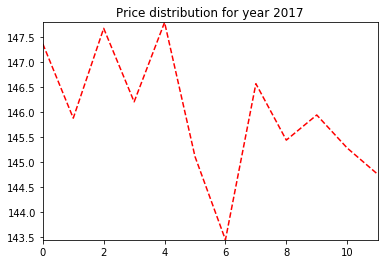

In [14]:
plt.plot(X_2017,'--r')
plt.axis([0,11, min(X_2017), max(X_2017)])
plt.title("Price distribution for year 2017")
plt.show()

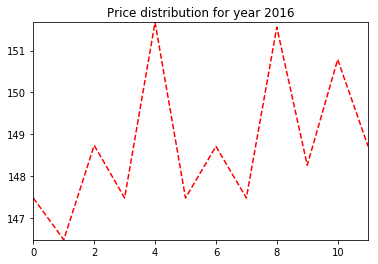

In [15]:
plt.plot(X_2016,'--r')
plt.axis([0,11, min(X_2016), max(X_2016)])
plt.title("Price distribution for year 2016")
plt.show()

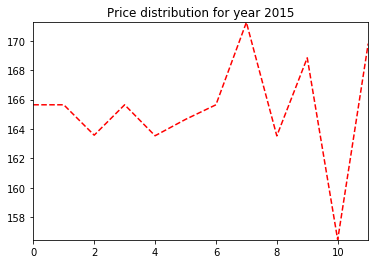

In [16]:
plt.plot(X_2015,'--r')
plt.axis([0,11, min(X_2015), max(X_2015)])
plt.title("Price distribution for year 2015")
plt.show()

In [17]:
# USE MME TO GET PARAMETERS FOR NORMAL DISTRIBUTION
k=2
alpha_1= 0
alpha_2=0
for i in X:
        alpha_1+=i
        alpha_2+=pow(i,2)
alpha_1=alpha_1/len(X)
alpha_2=alpha_2/len(X)
print(alpha_1)
print(alpha_2)

152.45059375000002
23317.59837134376


In [18]:
std= alpha_2- pow(alpha_1,2)
mean = alpha_1
print("mean is :",alpha_1)
print("Standard diviation is :",std)

mean is : 152.45059375000002
Standard diviation is : 76.41483661621169


##### Thus using MME we obtained parameters for normal distribution as N(152.45,76.4148)

In [19]:

from scipy.stats import norm
# here X has the actual samples for which we are doing ks-test

# calculate F_o(x)-unif_cdf
Y=[]
for i in sorted(X) :
    Y.append(float((i-mean)/std))
    
unif_cdf=norm.cdf(Y)
print(unif_cdf) 


[0.45313419 0.45993264 0.46176148 0.46265022 0.46347156 0.46575444
 0.46608215 0.46745044 0.46883993 0.46933441 0.47347421 0.47404725
 0.47404725 0.47404725 0.47404725 0.47508928 0.47571458 0.47813816
 0.48047911 0.48047911 0.49131549 0.49534532 0.49595089 0.52092248
 0.55765105 0.55769238 0.55789901 0.56343592 0.58492868 0.58667272
 0.58969776 0.59720121]


In [20]:
cdf = list()
prob = 0.0
for i in range(len(Y)):
    cdf.append(prob+(1/len(Y)))
    prob+=(1/len(Y))

In [21]:
cdf = np.asarray(cdf)
print (cdf)

[0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25    0.28125
 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125 0.5625
 0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125  0.84375
 0.875   0.90625 0.9375  0.96875 1.     ]


In [22]:
# calculate F_-(x)
f_minus_hat = np.zeros(len(Y))
for i in range(1,len(Y)):
    f_minus_hat[i] = cdf[i-1]
print(f_minus_hat)

[0.      0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25
 0.28125 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125
 0.5625  0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125
 0.84375 0.875   0.90625 0.9375  0.96875]


In [23]:
# calculate F_+(x)
f_plus_hat = np.zeros(len(Y))
for i in range(0,len(Y)):
    f_plus_hat[i] = cdf[i]
f_plus_hat[len(Y)-1]=1
print(f_plus_hat)

[0.03125 0.0625  0.09375 0.125   0.15625 0.1875  0.21875 0.25    0.28125
 0.3125  0.34375 0.375   0.40625 0.4375  0.46875 0.5     0.53125 0.5625
 0.59375 0.625   0.65625 0.6875  0.71875 0.75    0.78125 0.8125  0.84375
 0.875   0.90625 0.9375  0.96875 1.     ]


In [24]:
# calculate |F_-(x)-F_o(x)|
first_diff = abs(np.subtract(f_minus_hat,unif_cdf))
print(first_diff)

[0.45313419 0.42868264 0.39926148 0.36890022 0.33847156 0.30950444
 0.27858215 0.24870044 0.21883993 0.18808441 0.16097421 0.13029725
 0.09904725 0.06779725 0.03654725 0.00633928 0.02428542 0.05311184
 0.08202089 0.11327089 0.13368451 0.16090468 0.19154911 0.19782752
 0.19234895 0.22355762 0.25460099 0.28031408 0.29007132 0.31957728
 0.34780224 0.37154879]


In [25]:
# calculate |F_+(x)-F_o(x)|
second_diff = abs(np.subtract(f_plus_hat,unif_cdf))
print(second_diff)

[0.42188419 0.39743264 0.36801148 0.33765022 0.30722156 0.27825444
 0.24733215 0.21745044 0.18758993 0.15683441 0.12972421 0.09904725
 0.06779725 0.03654725 0.00529725 0.02491072 0.05553542 0.08436184
 0.11327089 0.14452089 0.16493451 0.19215468 0.22279911 0.22907752
 0.22359895 0.25480762 0.28585099 0.31156408 0.32132132 0.35082728
 0.37905224 0.40279879]


In [26]:
# max of |F_-(x)-F_o(x)|
maxVal = np.max(first_diff)
print(maxVal)

0.45313418710342734


In [27]:
# max of |F_+(x)-F_o(x)| and |F_-(x)-F_o(x)|
val = max(maxVal,np.max(second_diff))
print(val)

0.45313418710342734


In [30]:
# critical value for alpha = 0.1 is 0.37 
if val > 0.33 :
    print('Null hypothesis is rejected for alpha= 0.1')
else:
    print('Null hypothesis is accepted for alpha= 0.1')
    

Null hypothesis is rejected for alpha= 0.1


In [31]:
# critical value for alpha = 0.05 is 0.46 
if val > 0.37 :
    print('Null hypothesis is rejected for alpha= 0.05')
else:
    print('Null hypothesis is accepted for alpha= 0.05')
    

Null hypothesis is rejected for alpha= 0.05


Thus we can apply t-test as well as walds test.
We are going to test :
- How comic con affect the price of listings 
- How seasons affect the price of listing - (4 seasons)
- How Papal(The Pope) visit affects price of listing 


### How Comic-con affects the price of listings?
Comic Con takes place in the month of october. We think the price of the listings should increase as there are many visitors that come to NYC for this event. Hence we are comparing the price distribution during the event and without the event to check if out assumption is true. If not it means the event(Comic con) does not affect the price of listings.To check this we are applying walds test for two distribution.


In [9]:
cc=[]
year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if row[4] == str(10):
                content= row
                content.append(y)
                cc.append(content)
len(cc)

54108

In [10]:
cc

[['6553881', '175', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['1381569', '279', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['6939260', '185', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['2082223', '80', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['6911878', '250', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['8617650', '57', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['7697603', '249', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['5861447', '235', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['2189115', '200', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['4285967', '235', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['1797476', '168', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['7331616', '80', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['3139723', '250', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['3792297', '200', 'Manhattan', 'Battery Park City', '10', '2015'],
 ['5826482', '90', 'Manhattan', 'Batt

In [11]:
mean_cc = sum([float(row[1]) for row in cc])/len(cc)
mean_cc

188.13935092777407

In [12]:
std_cc= (sum([float(row[1])**2 for row in cc])/len(cc)) - pow(mean_cc,2)
std_cc
#print(max([float(row[1]) for row in cc]))

52756.75222322032

In [14]:
cc_listings=[[row[0],row[5]] for row in cc]
cc_listings

[['6553881', '2015'],
 ['1381569', '2015'],
 ['6939260', '2015'],
 ['2082223', '2015'],
 ['6911878', '2015'],
 ['8617650', '2015'],
 ['7697603', '2015'],
 ['5861447', '2015'],
 ['2189115', '2015'],
 ['4285967', '2015'],
 ['1797476', '2015'],
 ['7331616', '2015'],
 ['3139723', '2015'],
 ['3792297', '2015'],
 ['5826482', '2015'],
 ['8383276', '2015'],
 ['6676468', '2015'],
 ['7691534', '2015'],
 ['1531136', '2015'],
 ['7852297', '2015'],
 ['1431373', '2015'],
 ['8474652', '2015'],
 ['903614', '2015'],
 ['903575', '2015'],
 ['2214300', '2015'],
 ['6114526', '2015'],
 ['6633613', '2015'],
 ['7484427', '2015'],
 ['5845303', '2015'],
 ['1978394', '2015'],
 ['1377832', '2015'],
 ['5966458', '2015'],
 ['67502', '2015'],
 ['4091703', '2015'],
 ['7555525', '2015'],
 ['110784', '2015'],
 ['6637806', '2015'],
 ['1198449', '2015'],
 ['8626744', '2015'],
 ['2083269', '2015'],
 ['6921473', '2015'],
 ['6656727', '2015'],
 ['1673849', '2015'],
 ['4409421', '2015'],
 ['7292982', '2015'],
 ['9073', '2015

In [15]:
prices=[]
year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if([row[0],y] in cc_listings) :
                prices.append(row)       

KeyboardInterrupt: 

In [84]:
mean1 = sum([float(row[1]) for row in prices[1:]])/len(prices)-1
std1= (sum([float(row[1])**2 for row in prices])/len(prices)-1) 
std1 -= pow(mean1,2)
print(mean1,std1)

ValueError: could not convert string to float: 'price'

In [51]:
# Walds test
import math
def phi(x):
    #'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0
def wtest(cc,prices,mean1,mean2,std1,std2):
    se_hat = np.sqrt(std2/len(cc) + std1/len(prices))
    print("se_hat:",se_hat)
    diff = abs(mean2 - mean1)
    w = np.divide(diff,se_hat)
    if abs(w)>1.96:
        print("w = "+str(w))
        print("Null Hypothesis Rejected")
    else:
        print("w = "+str(w))
        print("Null Hypothesis Accepted")

    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * se_hat
    confidence_interval = (diff - margin_of_error, diff + margin_of_error)
    
        
    pVal = 2*norm.cdf(-abs(w))
    
    print("p-value: " + str(pVal))
    print("CI: " + str(confidence_interval))


In [ ]:
wtest(cc,prices,mean_cc,mean1,std_cc,std1)

In [86]:
# t-test 
# as for the t- test we need to prove that the two distributions under consideration are normally distributed. 
# This can be shown by calculating the parameters of two distribution using MME and then using KStest to prove normality

In [30]:
# using mme on comic con price distribution 
def mme(X):
    k=2
    alpha_1= 0
    alpha_2=0
    for i in X:
            alpha_1+=float(i[1])
            alpha_2+=pow(float(i[1]),2)
    alpha_1=alpha_1/len(X)
    alpha_2=alpha_2/len(X)
    print(alpha_1)
    print(alpha_2)
    std= alpha_2- pow(alpha_1,2)
    mean = alpha_1
    print("mean is :",alpha_1)
    print("Standard diviation is :",std)
    return mean,std


In [ ]:
mean_cc,std_cc=mme(cc)

In [31]:
# ks test 
from scipy.stats import norm

# here X has the actual samples for which we are doing ks-test
def kstest(cc,mean,std):
    X = [float(i[1]) for i in cc]
    # calculate F_o(x)-unif_cdf
    Y=[]
    for i in sorted(X) :
        Y.append(float((i-mean)/std))

    unif_cdf=norm.cdf(Y)
    print("F_o(x)",unif_cdf) 


    cdf = list()
    prob = 0.0
    for i in range(len(Y)):
        cdf.append(prob+(1/len(Y)))
        prob+=(1/len(Y))


    cdf = np.asarray(cdf)
    print ("CDF:",cdf)

    # calculate F_-(x)
    f_minus_hat = np.zeros(len(Y))
    for i in range(1,len(Y)):
        f_minus_hat[i] = cdf[i-1]
    print(f_minus_hat)

    # calculate F_+(x)
    f_plus_hat = np.zeros(len(Y))
    for i in range(0,len(Y)):
        f_plus_hat[i] = cdf[i]
    f_plus_hat[len(Y)-1]=1
    print(f_plus_hat)


    # calculate |F_-(x)-F_o(x)|
    first_diff = abs(np.subtract(f_minus_hat,unif_cdf))
    print("|F_-(x)-F_o(x)|",first_diff)


    # calculate |F_+(x)-F_o(x)|
    second_diff = abs(np.subtract(f_plus_hat,unif_cdf))
    print("|F_+(x)-F_o(x)|",second_diff)

    # max of |F_-(x)-F_o(x)|
    maxVal = np.max(first_diff)
    print(maxVal)

    # max of |F_+(x)-F_o(x)| and |F_-(x)-F_o(x)|
    val = max(maxVal,np.max(second_diff))
    print(val)


    # critical value for alpha = 0.1 is 0.33 
    if val > 0.33 :
        print('Null hypothesis is rejected for alpha= 0.1')
    else:
        print('Null hypothesis is accepted for alpha= 0.1')

    # critical value for alpha = 0.05 is 0.37 
    if val > 0.37 :
        print('Null hypothesis is rejected for alpha= 0.05')
    else:
        print('Null hypothesis is accepted for alpha= 0.05')



In [ ]:
kstest(cc,mean_cc,std_cc)



In [37]:
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
def pltcp(cc):
    cc_prices=[ float(i[1]) for i in cc]
    N= len(cc_prices)
    n=N//10
    p, x = np.histogram(cc_prices, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=N)
    pdf=f(x)/N
    # Compute the CDF
    CY = np.cumsum(pdf)
    plt.xlim([0,1000])
    plt.title("CDF for prices")
    plt.plot(x,CY)
    plt.xlabel('prices')
    plt.ylabel('CDF')
    plt.show()
    plt.plot(x, f(x))
    plt.xlim([0,1000])
    plt.title("Distribution for prices")
    plt.xlabel('prices')
    plt.ylabel('frequency')
    plt.show()
    
# plot the price distribution for comic con    
#pltcp(cc)

Thus prices are normally distributed for event comic con.
Now we need to check if prices are normally distributed also for non- comic con months eg sept of every year


In [89]:
ncc=[]
year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] == str(9) and (row[0] in cc_listings) ):
                ncc.append(row) 

In [90]:
# using mme on non comic con price distribution 
mean_ncc,std_ncc=mme(ncc)

186.38723597547127
89056.32012264365
mean is : 186.38723597547127
Standard diviation is : 54316.11838806764


In [91]:
# ks test 
from scipy.stats import norm
# here X has the actual samples for which we are doing ks-test
kstest(ncc,mean_ncc,std_ncc)

F_o(x) [0.49863102 0.49863102 0.49863102 ... 0.57168178 0.57168178 0.57168901]
CDF: [1.89264895e-05 3.78529790e-05 5.67794685e-05 ... 9.99962147e-01
 9.99981074e-01 1.00000000e+00]
[0.00000000e+00 1.89264895e-05 3.78529790e-05 ... 9.99943221e-01
 9.99962147e-01 9.99981074e-01]
[1.89264895e-05 3.78529790e-05 5.67794685e-05 ... 9.99962147e-01
 9.99981074e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49863102 0.49861209 0.49859317 ... 0.42826144 0.42828037 0.42829207]
|F_+(x)-F_o(x)| [0.49861209 0.49859317 0.49857424 ... 0.42828037 0.42829929 0.42831099]
0.4986310214125575
0.4986310214125575
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05


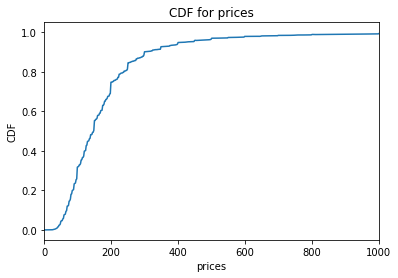

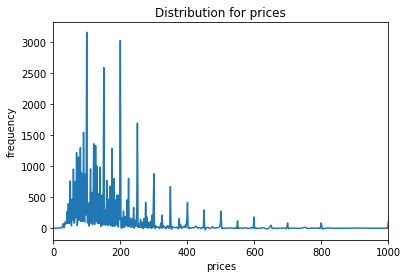

In [252]:
# plot the price distribuition for non comic con 
pltcp(ncc)

In [92]:
# thus as both distribution for prices are normally ditributed we can use t-test
# paired t-test
def pairedt(X,Y):
    diff = X - Y
    print(diff)
    diff_mean = np.mean(diff)
    diff_std = np.std(diff)
    # t-statistic
    t_statistic = diff_mean / (diff_std/np.sqrt(len(Y))) 
    print("t-statistic: "+str(t_statistic))

    if abs(t_statistic)>2.04:
        print("Null hypothesis rejected")
    else:
        print("Null hypothesis accepted")


In [93]:
ncc_df=pd.DataFrame(ncc)
ncc_df = ncc_df.rename(index=str, columns={1: "noneventprice", 0 : "id"})
cc_df=pd.DataFrame(cc)
cc_df = pd.concat([cc_df[0], cc_df[1]], axis=1)
cc_df = cc_df.rename(index=str, columns={1: "price", 0 : "id"})
ccresult = pd.merge(cc_df,
                 ncc_df[['noneventprice','id']],
                 on='id')
print(ccresult)

              id price noneventprice
0        6553881   175           175
1        6553881   175           175
2        6553881   175           175
3        6553881   175           175
4        1381569   279           279
5        6939260   185           185
6        2082223    80            80
7        2082223    80            95
8        2082223    80            95
9        2082223    95            80
10       2082223    95            95
11       2082223    95            95
12       6911878   250           200
13       7697603   249           249
14       5861447   235           235
15       2189115   200           200
16       2189115   200           175
17       2189115   175           200
18       2189115   175           175
19       4285967   235           282
20       1797476   168            88
21       1797476   168            90
22       1797476    90            88
23       1797476    90            90
24       7331616    80            66
25       3139723   250           250
2

In [117]:
ccprice = np.array(ccresult['price'].tolist(),dtype=np.float32)
nccprice = np.array(ccresult['noneventprice'].tolist(),dtype=np.float32)
pairedt(ccprice,nccprice)

[  0.   0.   0. ... -10.   0.   0.]
t-statistic: 4.17484354156794
Null hypothesis rejected


Thus comic con affects the price of listings.

In [95]:
counti = ccresult[ccresult['price'] > ccresult['noneventprice']].count()
countd = ccresult[ccresult['price'] < ccresult['noneventprice']].count()
print(counti,countd)

id               12649
price            12649
noneventprice    12649
dtype: int64 id               10948
price            10948
noneventprice    10948
dtype: int64


### How Papal(The Pope) visit affects price of listing
This is a unique event that tooks place in sept-2015, so we can compare how prices are distributed for september of 2015 vs september for the other years(2016,2017).

In [20]:
ppv=[]
ppv_listings=[]
year=['2015']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] == str(9)) :
                ppv.append(row)
                ppv_listings.append(row[0])
len(ppv)       

16034

In [22]:
nppv=[]
year=['2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] == str(9) and (row[0] in ppv_listings )) :
                nppv.append(row)
                
len(nppv)       

11434

In [23]:
mean_pp = sum([float(row[1]) for row in ppv[1:]])/len(ppv)-1
print(mean_pp)
std_pp= (sum([float(row[1])**2 for row in ppv])/len(ppv)-1) 
std_pp -= pow(mean_pp,2)
print(std_pp)

197.46407633778222
49593.06821803483


In [24]:
mean_pp1 = sum([float(row[1]) for row in nppv[1:]])/len(nppv)-1
print(mean_pp1)
std_pp1= (sum([float(row[1])**2 for row in nppv])/len(nppv)-1) 
std_pp1 -= pow(mean_pp1,2)
print(std_pp1)

192.01110722406858
59917.44635205375


In [46]:
# Walds test
# 2 population wald's test
def twopop_walds(X,Y):
    

    #calculate variances
    x_var = np.var(X)
    y_var = np.var(Y)
    #print x_var
    
    #calculate means
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    diff = x_mean - y_mean

    se_hat = np.sqrt(x_var/len(X) + y_var/len(Y))
    #print se_hat

    w = np.divide((diff),se_hat)
    print("walds statistic: "+str(w))
    
    z_critical = norm.ppf(0.975)
    margin_of_error = z_critical * se_hat
    confidence_interval = (diff - margin_of_error, diff + margin_of_error)
    
    pVal = 2*norm.cdf(-abs(w))
    
    print("p-value: " + str(pVal))
    print("CI: " + str(confidence_interval))

    if abs(w)>1.96:
        print("Null Hypothesis Rejected")
    else:
        print("Null Hypothesis Accepted")
    return abs(w)


In [52]:
wtest(ppv,nppv,mean_pp,mean_pp1,std_pp,std_pp1)

se_hat: 2.841519438854416
w = 1.919032838259255
Null Hypothesis Accepted
p-value: 0.05498017810602358
CI: (-0.11630664781148425, 11.022244875238755)


In [32]:
# for t-test show that prices are normally distributed
mean_ppv,std_ppv=mme(ppv)


198.46906573531245
88586.12966196831
mean is : 198.46906573531245
Standard diviation is : 49196.159608120535


In [33]:
mean_nppv,std_nppv=mme(nppv)

193.0181039006472
96786.71164946651
mean is : 193.0181039006472
Standard diviation is : 59530.723216065475


In [34]:
kstest(ppv,mean_ppv,std_ppv)

F_o(x) [0.49855276 0.4985933  0.49861763 ... 0.53887492 0.53887492 0.57896001]
CDF: [6.23674691e-05 1.24734938e-04 1.87102407e-04 ... 9.99875265e-01
 9.99937633e-01 1.00000000e+00]
[0.00000000e+00 6.23674691e-05 1.24734938e-04 ... 9.99812898e-01
 9.99875265e-01 9.99937633e-01]
[6.23674691e-05 1.24734938e-04 1.87102407e-04 ... 9.99875265e-01
 9.99937633e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49855276 0.49853094 0.4984929  ... 0.46093797 0.46100034 0.42097762]
|F_+(x)-F_o(x)| [0.49849039 0.49846857 0.49843053 ... 0.46100034 0.46106271 0.42103999]
0.4985527589863223
0.4985527589863223
Null hypothesis is rejected for alpha= 0.1
Null hypothesis is rejected for alpha= 0.05


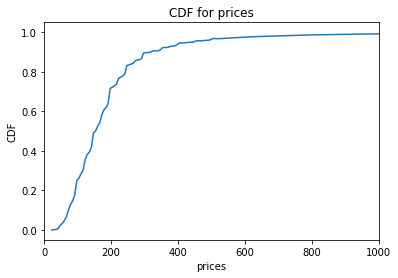

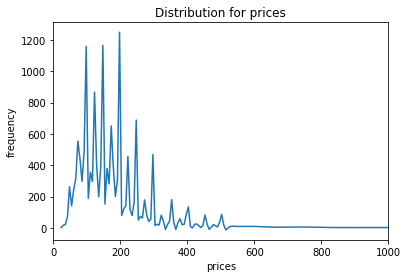

In [38]:
# Distribution and cdf of prices for The Pope visit
pltcp(ppv)

In [35]:
kstest(nppv,mean_nppv,std_nppv)

F_o(x) [0.49883383 0.49883383 0.49885393 ... 0.53217879 0.56541835 0.56541835]
CDF: [8.74584572e-05 1.74916914e-04 2.62375372e-04 ... 9.99825083e-01
 9.99912542e-01 1.00000000e+00]
[0.00000000e+00 8.74584572e-05 1.74916914e-04 ... 9.99737625e-01
 9.99825083e-01 9.99912542e-01]
[8.74584572e-05 1.74916914e-04 2.62375372e-04 ... 9.99825083e-01
 9.99912542e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49883383 0.49874637 0.49867902 ... 0.46755884 0.43440673 0.43449419]
|F_+(x)-F_o(x)| [0.49874637 0.49865891 0.49859156 ... 0.4676463  0.43449419 0.43458165]
0.498833827701362
0.498833827701362
Null hypothesis is rejected for alpha= 0.1
Null hypothesis is rejected for alpha= 0.05


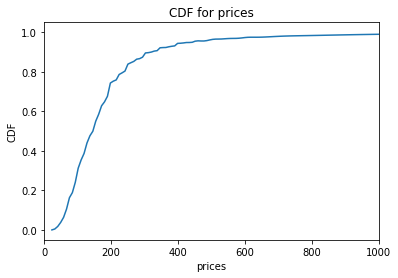

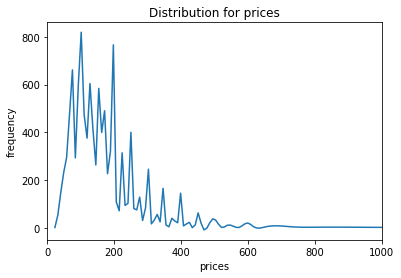

In [39]:
# Distribution and cdf of prices for other months
pltcp(nppv)

Thus popes visit does not affect the price of listing.

### How seasons effect the prices for listings
We have considered four seasons here, Fall,Spring, Winter and Summer. We are assuming that the number of visitors in summer are more than that in winter , hences the overall price for a listing should be more during summer than during winter.  
- Summer: May-Aug
- Winter:Dec-Feb
- Fall:Sept-Nov
- Spring:Mar-april

#### For summer and winter

In [40]:

s_months=['5','6','7','8']
w_months=['12','1','2']
s=[]
s_listings=[]

year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] in s_months) :
                s.append(row)
                content=[row[0]]
                content.append(y)
                s_listings.append(content)


In [43]:
from tqdm import tqdm

wi=[]                
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if((row[4] in w_months) and ([row[0],y] in s_listings)) :
                wi.append(row)


In [140]:
print(len(s),len(wi))

197480 118035


In [141]:
mean_s = sum([float(row[1]) for row in s[1:]])/len(s)-1
print(mean_s)
std_s= (sum([float(row[1])**2 for row in s])/len(s)-1) 
std_s -= pow(mean_s,2)
print(std_s)

184.743103099048
55027.61822010544


In [142]:
mean_w = sum([float(row[1]) for row in wi[1:]])/len(wi)-1
print(mean_w)
std_w= (sum([float(row[1])**2 for row in wi])/len(wi)-1) 
std_w -= pow(mean_w,2)
print(std_w)

182.10698521624943
48573.33561223949


In [143]:
# Walds test 
wtest(s,wi,mean_s,mean_w,std_s,std_w)


se_hat: 0.8438976931243238
w = -3.123741069890823
Null Hypothesis Rejected
phi: -6.247482139781646
P-value: 2.0856100180211001e-10


In [144]:
# for using t-test we need to show prices are noramally distributed for summer and winter
mean_s,std_s=mme(s)
mean_w,std_w=mme(wi)

185.74406015799067
89158.63236277092
mean is : 185.74406015799067
Standard diviation is : 54657.77647879566
183.1075443724319
81737.28967679078
mean is : 183.1075443724319
Standard diviation is : 48208.91687068866


In [255]:
# kstest
kstest(s,mean_s,std_s)


F_o(x) [0.49864427 0.49864427 0.49864427 ... 0.57125032 0.57125032 0.57125032]
CDF: [5.06380393e-06 1.01276079e-05 1.51914118e-05 ... 9.99989872e-01
 9.99994936e-01 1.00000000e+00]
[0.00000000e+00 5.06380393e-06 1.01276079e-05 ... 9.99984809e-01
 9.99989872e-01 9.99994936e-01]
[5.06380393e-06 1.01276079e-05 1.51914118e-05 ... 9.99989872e-01
 9.99994936e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49864427 0.49863921 0.49863415 ... 0.42873449 0.42873956 0.42874462]
|F_+(x)-F_o(x)| [0.49863921 0.49863415 0.49862908 ... 0.42873956 0.42874462 0.42874968]
0.4986970066299866
0.4986970066299866
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05


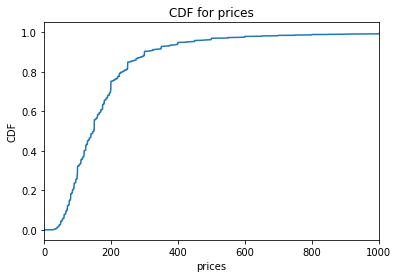

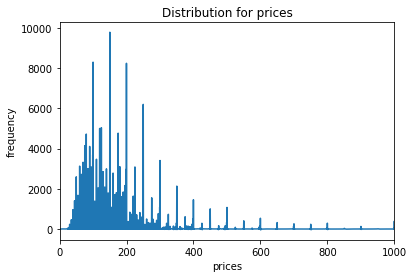

In [257]:
pltcp(s)

In [256]:
kstest(wi,mean_w,std_w)

F_o(x) [0.49856749 0.49856749 0.49856749 ... 0.58067147 0.58067147 0.58067957]
CDF: [8.47206337e-06 1.69441267e-05 2.54161901e-05 ... 9.99983056e-01
 9.99991528e-01 1.00000000e+00]
[0.00000000e+00 8.47206337e-06 1.69441267e-05 ... 9.99974584e-01
 9.99983056e-01 9.99991528e-01]
[8.47206337e-06 1.69441267e-05 2.54161901e-05 ... 9.99983056e-01
 9.99991528e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49856749 0.49855902 0.49855055 ... 0.41930312 0.41931159 0.41931195]
|F_+(x)-F_o(x)| [0.49855902 0.49855055 0.49854207 ... 0.41931159 0.41932006 0.41932043]
0.49856748969727005
0.49856748969727005
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05


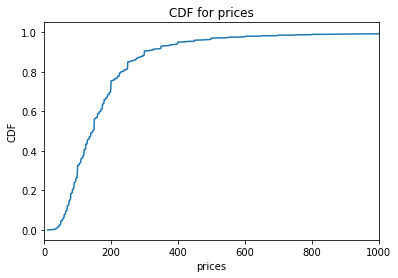

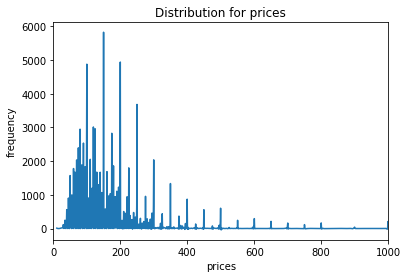

In [258]:
pltcp(wi)

In [146]:
# paired t test
s_df=pd.DataFrame(s)
s_df = s_df.rename(index=str, columns={1: "noneventprice", 0 : "id"})
w_df=pd.DataFrame(wi)
w_df = pd.concat([w_df[0], w_df[1]], axis=1)
w_df = w_df.rename(index=str, columns={1: "price", 0 : "id"})
swresult = pd.merge(w_df,
                 s_df[['noneventprice','id']],
                 on='id')
print(swresult)

              id price noneventprice
0        2082223    66            77
1        2082223    66            95
2        2082223    66            95
3        2082223    66            95
4        2082223    66            95
5        2082223    66            73
6        2082223    66            73
7        2082223    66            73
8        2082223    66            95
9        2082223    95            77
10       2082223    95            95
11       2082223    95            95
12       2082223    95            95
13       2082223    95            95
14       2082223    95            73
15       2082223    95            73
16       2082223    95            73
17       2082223    95            95
18       2082223    95            77
19       2082223    95            95
20       2082223    95            95
21       2082223    95            95
22       2082223    95            95
23       2082223    95            73
24       2082223    95            73
25       2082223    95            73
2

In [147]:
wprice = np.array(swresult['price'].tolist(),dtype=np.float32)
sprice = np.array(swresult['noneventprice'].tolist(),dtype=np.float32)
pairedt(wprice,sprice)

[-11. -29. -29. ...   0.   0.   0.]
t-statistic: 1.30096324294018
Null hypothesis accepted


#### For spring and fall

In [262]:
# for spring and fall
sp_months=['3','4']
f_months=['9','10','11']
f_listings=[]
fl=[]
sp=[]
year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] in f_months) :
                fl.append(row)
                f_listings.append(row[0])
           

In [266]:
sp_listings=[]
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] in sp_months and row[0] in f_listings) :
                sp.append(row)
                sp_listings.append(row[0])
                


In [264]:
fn=[]
for row in fl:
    if(row[0] in sp_listings) :
        fn.append(row)
                
print(len(fn),len(sp))

132702 0


In [267]:
mean_sp = sum([float(row[1]) for row in sp[1:]])/len(sp)-1
print(mean_sp)
std_sp= (sum([float(row[1])**2 for row in sp])/len(sp)-1) 
std_sp -= pow(mean_sp,2)
print(std_sp)

184.33134407692864
49008.16960901035


In [268]:
mean_f = sum([float(row[1]) for row in fl[1:]])/len(fl)-1
print(mean_f)
std_f= (sum([float(row[1])**2 for row in fl])/len(fl)-1) 
std_f -= pow(mean_f,2)
print(std_f)

186.82040639809716
54418.270184166344


In [269]:
# Walds test 
wtest(sp,fl,mean_sp,mean_f,std_sp,std_f)


se_hat: 1.2685293289018083
w = 1.9621637942918908
Null Hypothesis Rejected
phi: -3.9243275885837816
P-value: 4.348616020255491e-05


In [270]:
# for using t-test we need to show prices are noramally distributed for summer and winter
mean_sp,std_sp=mme(sp)
mean_f,std_f=mme(fl)

185.33661117688274
82987.2140182174
mean is : 185.33661117688274
Standard diviation is : 48637.55457568639
187.82088691609556
89321.13443091653
mean is : 187.82088691609556
Standard diviation is : 54044.448868967775


In [271]:
# kstest for spring price distribution
kstest(sp,mean_sp,std_sp)


F_o(x) [0.49856183 0.49856183 0.49856183 ... 0.57994421 0.57995225 0.57995225]
CDF: [2.41610090e-05 4.83220179e-05 7.24830269e-05 ... 9.99951678e-01
 9.99975839e-01 1.00000000e+00]
[0.00000000e+00 2.41610090e-05 4.83220179e-05 ... 9.99927517e-01
 9.99951678e-01 9.99975839e-01]
[2.41610090e-05 4.83220179e-05 7.24830269e-05 ... 9.99951678e-01
 9.99975839e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49856183 0.49853767 0.49851351 ... 0.41998331 0.41999943 0.42002359]
|F_+(x)-F_o(x)| [0.49853767 0.49851351 0.49848935 ... 0.42000747 0.42002359 0.42004775]
0.49856183073750054
0.49856183073750054
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05


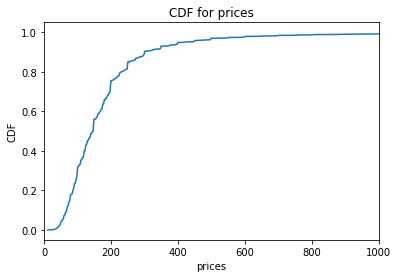

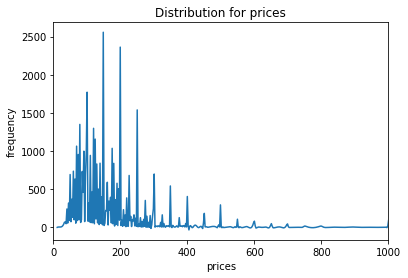

In [272]:
pltcp(sp)

In [273]:
# kstest for fall price distribution
kstest(fl,mean_f,std_f)

F_o(x) [0.49861356 0.49861356 0.49861356 ... 0.57203503 0.57203503 0.57203503]
CDF: [6.00647498e-06 1.20129500e-05 1.80194249e-05 ... 9.99987987e-01
 9.99993994e-01 1.00000000e+00]
[0.00000000e+00 6.00647498e-06 1.20129500e-05 ... 9.99981981e-01
 9.99987987e-01 9.99993994e-01]
[6.00647498e-06 1.20129500e-05 1.80194249e-05 ... 9.99987987e-01
 9.99993994e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49861356 0.49860755 0.49860154 ... 0.42794695 0.42795296 0.42795897]
|F_+(x)-F_o(x)| [0.49860755 0.49860154 0.49859554 ... 0.42795296 0.42795897 0.42796497]
0.4986135571058357
0.4986135571058357
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05


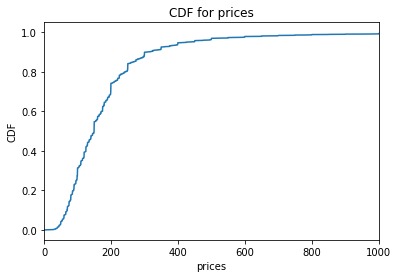

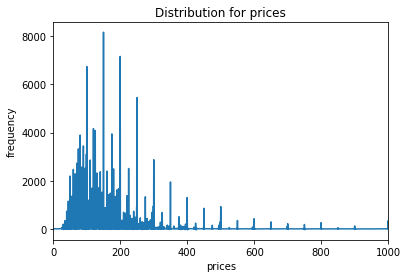

In [274]:
pltcp(fl)

In [184]:
# paired t test
sp_df=pd.DataFrame(sp)
sp_df = sp_df.rename(index=str, columns={1: "noneventprice", 0 : "id"})
f_df=pd.DataFrame(f)
f_df = pd.concat([f_df[0], f_df[1]], axis=1)
f_df = f_df.rename(index=str, columns={1: "price", 0 : "id"})
spfresult = pd.merge(f_df,
                 sp_df[['noneventprice','id']],
                 on='id')
print(spfresult)

              id price noneventprice
0        2082223    80            95
1        2082223    80            73
2        2082223    80            95
3        2082223    80            73
4        2082223    80            95
5        2082223    80            73
6        2082223    95            95
7        2082223    95            73
8        2082223    95            95
9        2082223    95            73
10       2082223    95            95
11       2082223    95            73
12       2082223    95            95
13       2082223    95            73
14       2986941   300           300
15       1712688   400           400
16       1712688   400           400
17       1712688   400           400
18       1712688   400           400
19       1712688   400           400
20       1712688   400           400
21       1712688   400           400
22       1712688   400           400
23       1712688   400           400
24       1712688   400           400
25       1712688   400           400
2

In [185]:
fprice = np.array(spfresult['price'].tolist(),dtype=np.float32)
spprice = np.array(spfresult['noneventprice'].tolist(),dtype=np.float32)
pairedt(fprice,spprice)

[-15.   7. -15. ... 125. 125. 125.]
t-statistic: 20.46475913460525
Null hypothesis rejected


### Considering data for winter and fall only , how comic con affects pricing



In [187]:
wf_months=['3','4','9','10','11']
w_f=[]
year=['2015','2016','2017']
for y in year:
    with open('data/prices_'+y+'.csv','r') as csvfile:
        data = csv.reader(csvfile) 
        for row in data:
            if(row[4] in wf_months and row[0] in cc_listings) :
                w_f.append(row)
print(len(w_f))
w_f

198349


[['980018', '218', 'Manhattan', 'Upper West Side', '3'],
 ['3553768', '125', 'Manhattan', 'West Village', '3'],
 ['704829', '90', 'Manhattan', 'Harlem', '3'],
 ['2207548', '89', 'Manhattan', "Hell's Kitchen", '3'],
 ['3588836', '175', 'Manhattan', 'Upper West Side', '3'],
 ['2274084', '2750', 'Manhattan', 'Kips Bay', '3'],
 ['2262566', '750', 'Manhattan', 'Financial District', '3'],
 ['45941', '145', 'Manhattan', 'Harlem', '3'],
 ['647204', '140', 'Manhattan', 'Harlem', '3'],
 ['5442977', '210', 'Manhattan', 'Chelsea', '3'],
 ['4294352', '159', 'Manhattan', 'Chelsea', '3'],
 ['1660838', '75', 'Manhattan', 'Stuyvesant Town', '3'],
 ['71010', '250', 'Manhattan', 'Washington Heights', '3'],
 ['1171635', '100', 'Manhattan', 'Kips Bay', '3'],
 ['975032', '160', 'Manhattan', 'Lower East Side', '3'],
 ['504938', '225', 'Manhattan', 'West Village', '3'],
 ['440075', '179', 'Manhattan', 'East Village', '3'],
 ['4672021', '130', 'Manhattan', 'Theater District', '3'],
 ['489708', '175', 'Manhatta

In [193]:
mean_wf = sum([float(row[1]) for row in w_f])/len(w_f)
print(mean_wf)
std_wf= (sum([float(row[1])**2 for row in w_f])/len(w_f))
std_wf -= pow(mean_wf,2)
print(std_wf)

186.95260374390594
52395.698770489376


In [194]:
# Walds test 
wtest(w_f,cc,mean_wf,mean_cc,std_wf,std_cc)


se_hat: 1.111005594581119
w = 1.0681739044847682
Null Hypothesis Accepted
phi: -2.1363478089695365
P-value: 0.01632553735801129


In [195]:
# for using t-test we need to show prices are noramally distributed for summer and winter
mean_wf,std_wf=mme(w_f)
mean_cc,std_cc=mme(cc)

186.95260374390594
87346.97481711529
mean is : 186.95260374390594
Standard diviation is : 52395.698770489376
188.13935092777407
88153.16759074444
mean is : 188.13935092777407
Standard diviation is : 52756.75222322032


In [196]:
# kstest
kstest(w_f,mean_wf,std_wf)


F_o(x) [0.49857654 0.49857654 0.49857654 ... 0.57427482 0.57427482 0.5742823 ]
CDF: [5.04161856e-06 1.00832371e-05 1.51248557e-05 ... 9.99989917e-01
 9.99994958e-01 1.00000000e+00]
[0.00000000e+00 5.04161856e-06 1.00832371e-05 ... 9.99984875e-01
 9.99989917e-01 9.99994958e-01]
[5.04161856e-06 1.00832371e-05 1.51248557e-05 ... 9.99989917e-01
 9.99994958e-01 1.00000000e+00]
|F_-(x)-F_o(x)| [0.49857654 0.4985715  0.49856646 ... 0.42571006 0.4257151  0.42571266]
|F_+(x)-F_o(x)| [0.4985715  0.49856646 0.49856142 ... 0.4257151  0.42572014 0.4257177 ]
0.49859722280279056
0.49859722280279056
Null hypothesis is accepted for alpha= 0.1
Null hypothesis is accepted for alpha= 0.05
F_o(x) [0.49857731 0.49857731 0.49857731 ... 0.57376353 0.57376353 0.57376353]
CDF: [1.84815554e-05 3.69631108e-05 5.54446662e-05 ... 9.99963037e-01
 9.99981518e-01 1.00000000e+00]
[0.00000000e+00 1.84815554e-05 3.69631108e-05 ... 9.99944555e-01
 9.99963037e-01 9.99981518e-01]
[1.84815554e-05 3.69631108e-05 5.54446662e-0

In [ ]:
pltcp(w_f)

#### we already know that prices for comic con are normally distributed as seen above.

In [197]:
# paired t test
wf_df=pd.DataFrame(w_f)
wf_df = wf_df.rename(index=str, columns={1: "noneventprice", 0 : "id"})
ccwfresult = pd.merge(cc_df,
                 wf_df[['noneventprice','id']],
                 on='id')
print(ccwfresult)

              id price noneventprice
0        6553881   175           175
1        6553881   175           175
2        6553881   175           175
3        6553881   175           175
4        6553881   175           175
5        6553881   175           175
6        6553881   175           175
7        6553881   175           175
8        6553881   175           175
9        6553881   175           175
10       6553881   175           175
11       6553881   175           175
12       6553881   175           175
13       6553881   175           175
14       1381569   279           179
15       1381569   279           279
16       1381569   279           279
17       1381569   279           279
18       1381569   279           279
19       6939260   185           185
20       6939260   185           185
21       6939260   185           215
22       2082223    80            80
23       2082223    80            80
24       2082223    80            80
25       2082223    80            95
2

In [199]:
ccprice = np.array(ccwfresult['price'].tolist(),dtype=np.float32)
wfprice = np.array(ccwfresult['noneventprice'].tolist(),dtype=np.float32)
pairedt(ccprice,wfprice)

[0. 0. 0. ... 0. 0. 0.]
t-statistic: 9.627691063216492
Null hypothesis rejected
